In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [7]:
global_terrorism = pd.read_csv(r"C:\Users\user\Downloads\Global Terrorism - START data\globalterrorismdb_0718dist.csv",encoding='latin1')

In [8]:
global_terrorism.head(2)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1.970000e+11,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,1.970000e+11,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN


In [9]:
global_terrorism.tail(2)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181689,2.017123e+11,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
181690,2.017123e+11,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Security tightened in Cotabato following IED ...","""Security tightened in Cotabato City,"" Manila ...",NaN,START Primary Collection,-9,-9,0,-9,NaN


In [10]:
global_terrorism.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [12]:
global_terrorism.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

# Checking duplicates

In [13]:
global_terrorism.duplicated().sum()

0

# Checking null values


In [14]:
global_terrorism.isna().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

#  Analyzing the Attacks over the Years


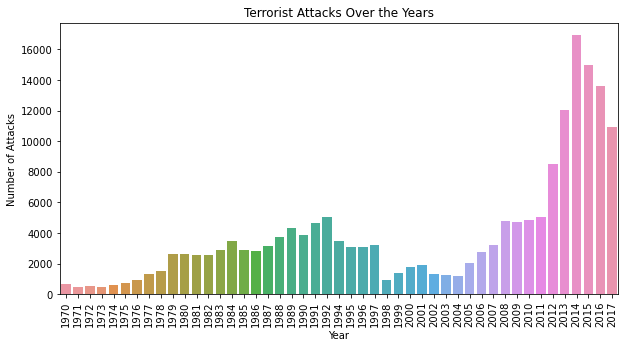

In [15]:
attacks_per_year = global_terrorism['iyear'].value_counts().sort_index()
plt.figure(figsize=(10, 5))
sns.barplot(x=attacks_per_year.index, y=attacks_per_year.values)
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=90)
plt.title('Terrorist Attacks Over the Years')
plt.show()

# In the year of 2014 highest numbers of attacked carry out by the terrorist group and in 1971 is the least numbers of attack

# Analyzing the Attacks over the Months

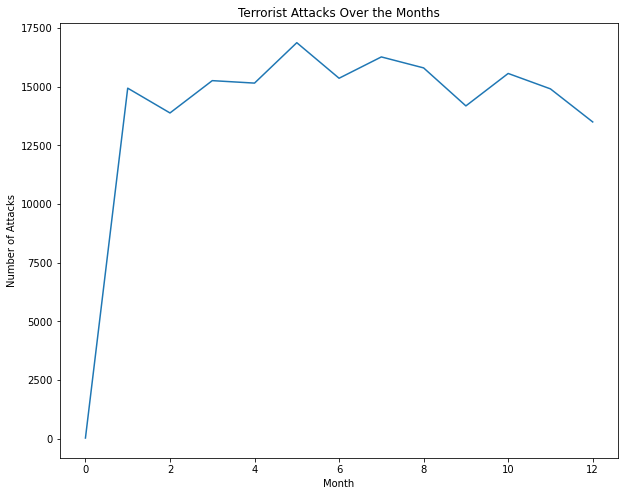

In [17]:
attack_per_month = global_terrorism['imonth'].value_counts().sort_index()
plt.figure(figsize=(10,8))
sns.lineplot(x=attack_per_month.index, y =attack_per_month.values)
plt.xlabel('Month')
plt.ylabel('Number of Attacks')
plt.title('Terrorist Attacks Over the Months')
plt.show()


# In the 5th(MAY) month highest numbers of attack was done 


# Top  regions with most terrorist attack


In [16]:
attacks_by_region = global_terrorism['region_txt'].value_counts()
print(attacks_by_region)

Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: region_txt, dtype: int64


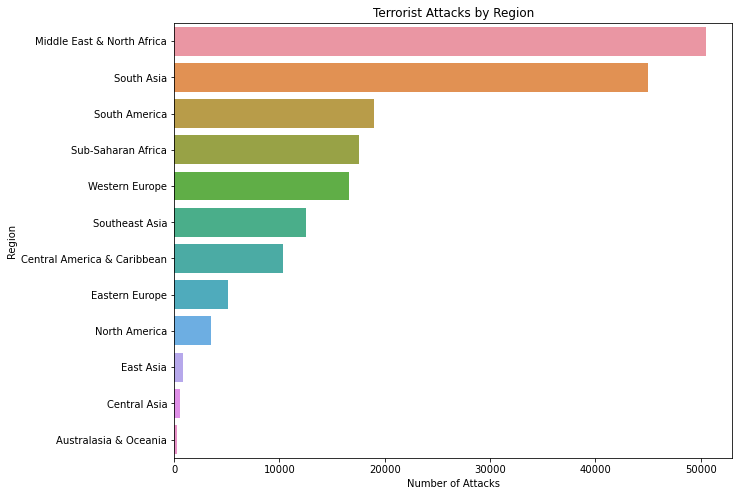

In [18]:
plt.figure(figsize=(10,8))
sns.barplot(x=attacks_by_region.values, y=attacks_by_region.index)
plt.xlabel('Number of Attacks')
plt.ylabel('Region')
plt.title('Terrorist Attacks by Region')
plt.show()

# Middle East & North Africa  followed by South Asia are the regions where most numbers of attacks has been done. East Asia, Central Asia and Australia & Oceania are the less effected by terrorism 

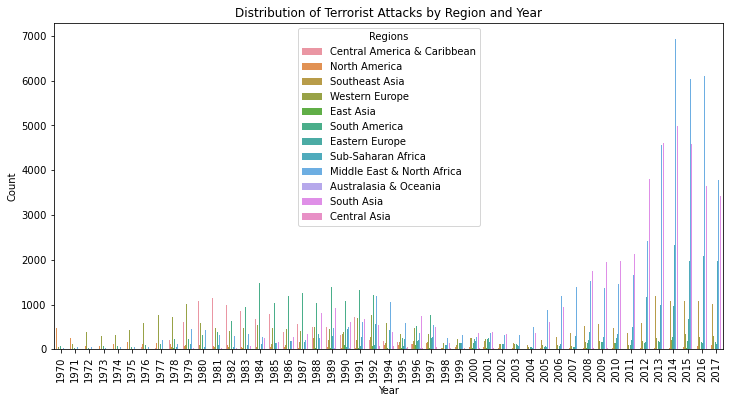

In [19]:
plt.figure(figsize=(12, 6))
sns.countplot(x='iyear', hue='region_txt', data=global_terrorism)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Distribution of Terrorist Attacks by Region and Year')
plt.xticks(rotation=90)
plt.legend(title='Regions')
plt.show()

# In 2014 South Asia is the region where most number of terrorist attack was conducted

# Top 10 countries with most numbers of attacks


In [20]:
attacks_by_countries = global_terrorism['country_txt'].value_counts().head(10)
print(attacks_by_countries)

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: country_txt, dtype: int64


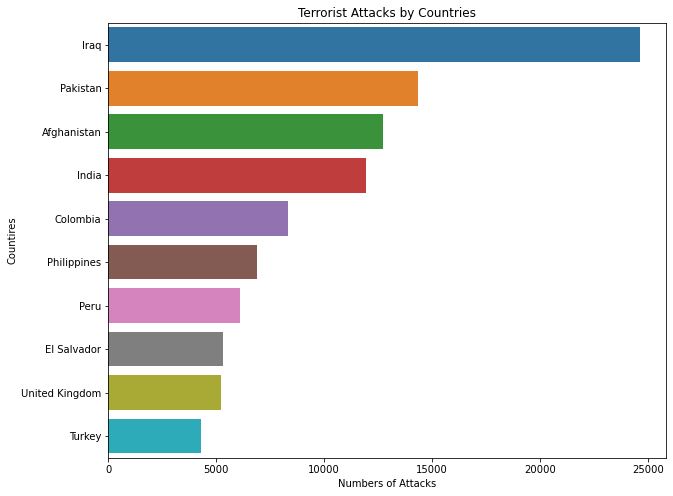

In [21]:
plt.figure(figsize=(10,8))
sns.barplot(x=attacks_by_countries.values, y= attacks_by_countries.index)
plt.xlabel("Numbers of Attacks")
plt.ylabel("Countires")
plt.title('Terrorist Attacks by Countries')
plt.show()

# Iraq is the most affected country with the terrorist attack followed by Pakistan, Afghanistan and India.

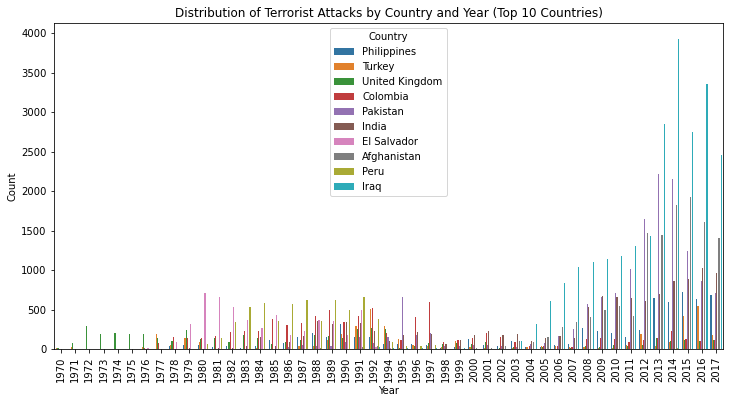

In [22]:
plt.figure(figsize=(12, 6))
top_10_countries = global_terrorism['country_txt'].value_counts().nlargest(10).index
subset_data = global_terrorism[global_terrorism['country_txt'].isin(top_10_countries)]
sns.countplot(x='iyear', hue='country_txt', data=subset_data)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Distribution of Terrorist Attacks by Country and Year (Top 10 Countries)')
plt.xticks(rotation=90)
plt.legend(title='Country')
plt.show()

# According to the year of 2014 Iraq is the country where mosr numbers of attack was done

# Top States with most numbers of Attacks  

In [24]:
global_terrorism['provstate'].unique()

array([nan, 'Federal', 'Tarlac', ..., 'Carlow', 'Western Lakes',
       'Vidzeme'], dtype=object)

In [25]:
global_terrorism['provstate'].value_counts()

Baghdad                  7645
Northern Ireland         4498
Unknown                  4290
Balochistan              3710
Saladin                  3411
                         ... 
Federal Territory           1
Topaz (Province)            1
Obilic (Municipality)       1
East Timor (Region)         1
Vidzeme                     1
Name: provstate, Length: 2855, dtype: int64

In [26]:
attacks_by_states = global_terrorism['provstate'].value_counts().head(10)
print(attacks_by_states)

Baghdad               7645
Northern Ireland      4498
Unknown               4290
Balochistan           3710
Saladin               3411
Al Anbar              3299
Nineveh               3241
Sindh                 3206
Khyber Pakhtunkhwa    3084
Diyala                3041
Name: provstate, dtype: int64


In [27]:
#drop UNKNOWN cloumn in region 
attacks_by_states = attacks_by_states.drop('Unknown', axis=0)
print(attacks_by_states)


Baghdad               7645
Northern Ireland      4498
Balochistan           3710
Saladin               3411
Al Anbar              3299
Nineveh               3241
Sindh                 3206
Khyber Pakhtunkhwa    3084
Diyala                3041
Name: provstate, dtype: int64


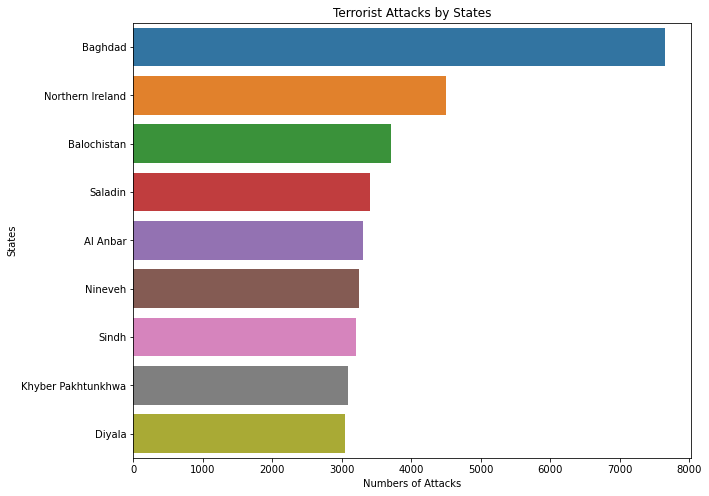

In [28]:
plt.figure(figsize=(10,8))
sns.barplot(x=attacks_by_states.values, y= attacks_by_states.index)
plt.xlabel("Numbers of Attacks")
plt.ylabel("States")
plt.title('Terrorist Attacks by States')
plt.show()

# Baghdad is the most affected States by the Terrorist attack followed by Northern Ireland and Blochistan 

# Top cities attacked by terrorist

In [29]:
global_terrorism['city'].value_counts()

Unknown      9775
Baghdad      7589
Karachi      2652
Lima         2359
Mosul        2265
             ... 
Hotwag          1
Ostend          1
Balughata       1
Jikoyi          1
Kubentog        1
Name: city, Length: 36674, dtype: int64

In [30]:
attacks_by_city = global_terrorism['city'].value_counts().head(10)
print(attacks_by_city)

Unknown         9775
Baghdad         7589
Karachi         2652
Lima            2359
Mosul           2265
Belfast         2171
Santiago        1621
Mogadishu       1581
San Salvador    1558
Istanbul        1048
Name: city, dtype: int64


In [31]:
#drop cloumn unknown in city
attacks_by_city= attacks_by_city.drop('Unknown', axis =0)
attacks_by_city

Baghdad         7589
Karachi         2652
Lima            2359
Mosul           2265
Belfast         2171
Santiago        1621
Mogadishu       1581
San Salvador    1558
Istanbul        1048
Name: city, dtype: int64

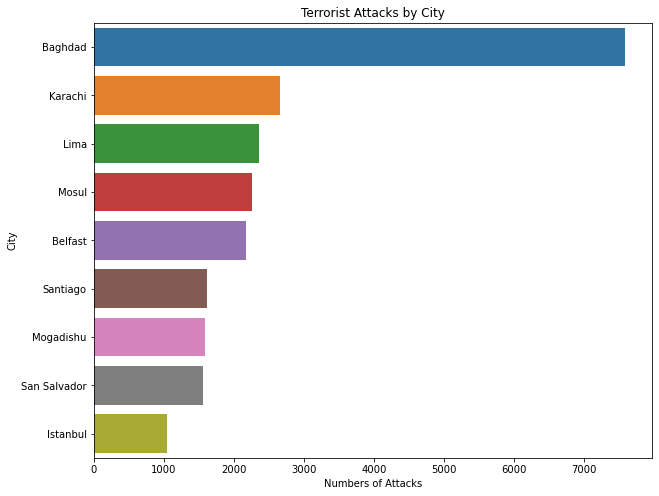

In [32]:
plt.figure(figsize=(10,8))
sns.barplot(x=attacks_by_city.values, y= attacks_by_city.index)
plt.xlabel("Numbers of Attacks")
plt.ylabel("City")
plt.title('Terrorist Attacks by City')
plt.show()

# Baghdad is the most affected city by terrorist attack followed by Karachi 

# Analysis Attack types
 

In [33]:
attack_type = global_terrorism['attacktype1_txt'].value_counts()
attack_type

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: attacktype1_txt, dtype: int64

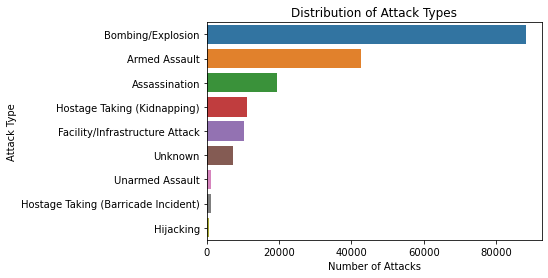

In [34]:
sns.barplot(x=attack_type.values, y=attack_type.index)
plt.xlabel('Number of Attacks')
plt.ylabel('Attack Type')
plt.title('Distribution of Attack Types')
plt.show()

# Bombing/Explosion is mostly attack type  used by the terrorist 

# Analysis types of Targets 

In [35]:
attack_types_targets =global_terrorism['targtype1_txt'].value_counts()
attack_types_targets

Private Citizens & Property       43511
Military                          27984
Police                            24506
Government (General)              21283
Business                          20669
Transportation                     6799
Utilities                          6023
Unknown                            5898
Religious Figures/Institutions     4440
Educational Institution            4322
Government (Diplomatic)            3573
Terrorists/Non-State Militia       3039
Journalists & Media                2948
Violent Political Party            1866
Airports & Aircraft                1343
Telecommunication                  1009
NGO                                 970
Tourists                            440
Maritime                            351
Food or Water Supply                317
Abortion Related                    263
Other                               137
Name: targtype1_txt, dtype: int64

In [36]:
#droping the unknown cloumn 

attack_types_targets=attack_types_targets.drop('Unknown',axis=0)
attack_types_targets

Private Citizens & Property       43511
Military                          27984
Police                            24506
Government (General)              21283
Business                          20669
Transportation                     6799
Utilities                          6023
Religious Figures/Institutions     4440
Educational Institution            4322
Government (Diplomatic)            3573
Terrorists/Non-State Militia       3039
Journalists & Media                2948
Violent Political Party            1866
Airports & Aircraft                1343
Telecommunication                  1009
NGO                                 970
Tourists                            440
Maritime                            351
Food or Water Supply                317
Abortion Related                    263
Other                               137
Name: targtype1_txt, dtype: int64

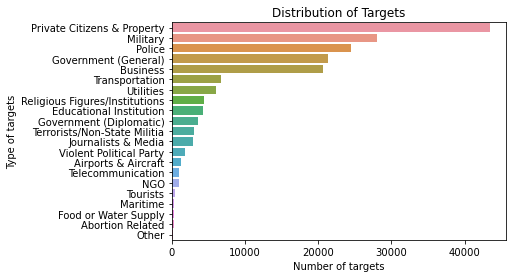

In [37]:
sns.barplot(x=attack_types_targets.values,y=attack_types_targets.index)
plt.xlabel('Number of targets')
plt.ylabel('Type of targets')
plt.title('Distribution of Targets')
plt.show()

# Private Citizens& Property highly affected by terrorism 

# Analysing the Top 10 active terrorist group 

In [38]:
attack_by_terrorist_group = global_terrorism['gname'].value_counts().head(10)
attack_by_terrorist_group

Unknown                                             82782
Taliban                                              7478
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4555
Farabundo Marti National Liberation Front (FMLN)     3351
Al-Shabaab                                           3288
New People's Army (NPA)                              2772
Irish Republican Army (IRA)                          2671
Revolutionary Armed Forces of Colombia (FARC)        2487
Boko Haram                                           2418
Name: gname, dtype: int64

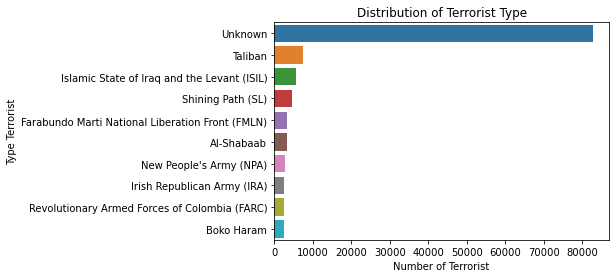

In [39]:
sns.barplot(x=attack_by_terrorist_group.values, y=attack_by_terrorist_group.index)
plt.xlabel('Number of Terrorist')
plt.ylabel('Type Terrorist')
plt.title('Distribution of Terrorist Type')
plt.show()

# Mostly active group isTaliban but the First one is still Unknown 

# Weapons used by Terrorist  

In [40]:
weapon_used = global_terrorism['weaptype1_txt'].value_counts()
weapon_used

Explosives                                                                     92426
Firearms                                                                       58524
Unknown                                                                        15157
Incendiary                                                                     11135
Melee                                                                           3655
Chemical                                                                         321
Sabotage Equipment                                                               141
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)      136
Other                                                                            114
Biological                                                                        35
Fake Weapons                                                                      33
Radiological                                                     

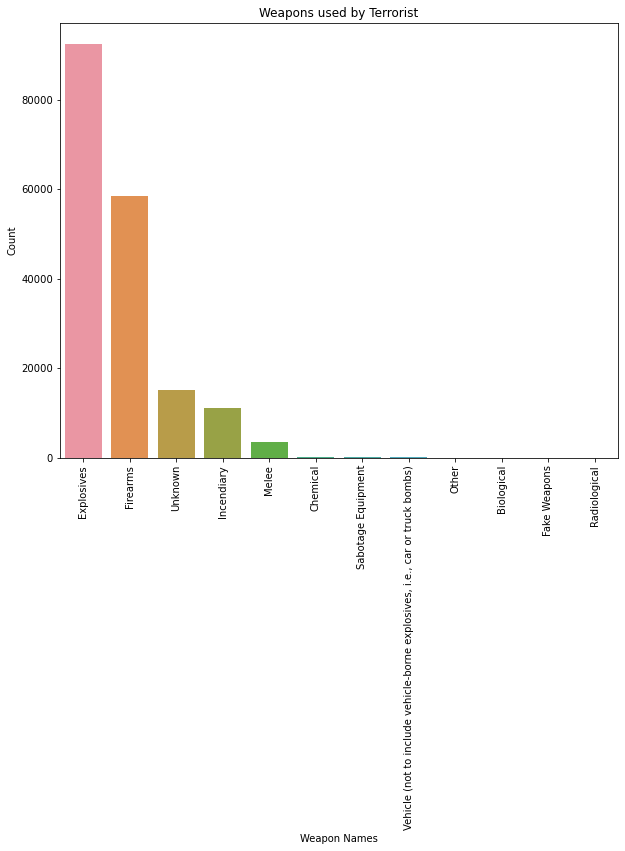

In [43]:
plt.figure(figsize=(10, 8))
sns.barplot(x=weapon_used.index, y=weapon_used.values)
plt.xlabel('Weapon Names')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.title('Weapons used by Terrorist')
plt.show()

# Explosives as a Weapon mostly used by the Terrorist  

# Attack successfully Done

In [42]:
global_terrorism['success'].value_counts()

1    161632
0     20059
Name: success, dtype: int64

# Suicide Data

In [45]:
global_terrorism['suicide'].value_counts()

0    175058
1      6633
Name: suicide, dtype: int64

# Over all Analysis

Hotzone of Terrorism  - Iraq.

Mostly active group of terrorist is Taliban with most numbers of attack.

According to the year data 2014 is the highest numbers of attack done by terrorist and 1971 was the least.

In month of May mot numbers of successful attack was done.

Region which is mostly affected by terrorism is Middle East & North America followed by South Asia.

Baghdad is mostly affected State by attacks.

Baghdad is mostly affected city by the attacks.

Private Citizens & Property are the mostly targets by the terrorist folowed by Military,Police,Transportation. These are all the top most taregts .

Bombing/Explosion is the mostly type of attack choosen by the terroirst.
Explosive is the commenly used weapons by the terrorist.